we are going to try an model the relationships between two financial assets, the price of a single share of Exxon Mobile stock and the price of a barrel of oil. The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of Exxon Mobile stock.)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [26]:

df = pd.read_excel("/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/Datasets/oil_exxon.xlsx")

In [27]:
# set the index equal to the date column & then drop the old date column
df.index = pd.to_datetime(df['date'])
df = df.drop(['date'], axis = 1)

In [28]:
df.head(5)


,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [29]:
df.describe()

,exon_price,oil_price
count,1256.000000,1248.000000
mean,84.742962,61.935000
std,7.466182,19.288424
min,65.510002,26.010000
25%,80.167500,48.162500
50%,83.010002,57.120000
75%,88.515001,70.725000
max,104.379997,115.190000


In [30]:
display(df.isna().any())


exon_price    False
oil_price      True
dtype: bool

In [31]:
df=df.dropna()

In [32]:
df = df.rename(columns={'exon_price':'exxon_price'})
df.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


##Performing EDA

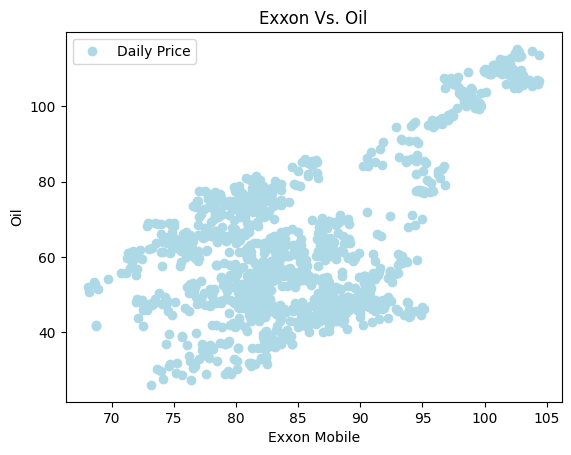

In [33]:
x=df['exxon_price']
y=df['oil_price']
plt.plot(x,y,'o',color='lightblue',label="Daily Price")
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")
plt.legend()

plt.show()

In [34]:
df.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [35]:
df.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


{'whiskers': [<matplotlib.lines.Line2D at 0x12e0d0980>,
 'caps': [<matplotlib.lines.Line2D at 0x12e0d06b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e0d0740>,
 'medians': [<matplotlib.lines.Line2D at 0x12e0d3b60>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e0d34d0>,
 'means': []}

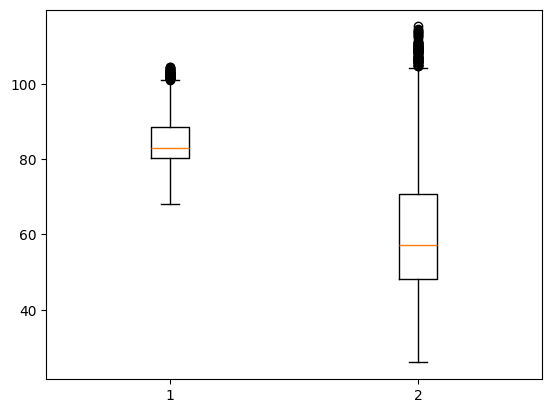

In [36]:
plt.boxplot(df)

array([[<Axes: title={'center': 'exxon_price'}>,
        <Axes: title={'center': 'oil_price'}>]], dtype=object)

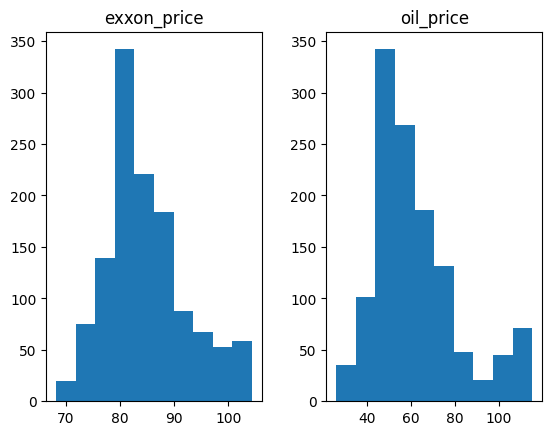

In [37]:
df.hist(grid=False)

Okay, so some of the data does appear to be skewed but not too much. However, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew, where kurtosis measure the height of our distribution and skew measures whether it is positively or negatively skewed. We will use the scipy.stats module to do the measurements.


In [38]:
exxon_kurt=kurtosis(df['exxon_price'],fisher=True)
oil_kurt=kurtosis(df['oil_price'],fisher=True)

exxon_skew=skew(df['exxon_price'])
oil_skew=skew(df['oil_price'])

In [39]:
display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurt))  # this looks fine
display("Oil Excess Kurtosis: {:.1}".format(oil_kurt))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it.

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.5'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

Model Building

In [40]:
X=df[['oil_price']]
Y=df.drop('oil_price',axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [41]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [42]:
intercept=regression_model.intercept_[0]
coefficient=regression_model.coef_[0][0]
print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))


The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [43]:
y_predict=regression_model.predict(X_test)
y_predict[:5] #First 5 predictions

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])